<font color='red'>                      **CV Compiled: By Alem Fitwi, August 2017 to Date**</font>

## <div class="alert alert-info"> Packages

- !pip install pkg_name

In [414]:
# Standard/Built-in Modules
#---------------------------------------------------
import os
import re
import gc
import sys
import math
import warnings
from time import perf_counter as pc
warnings.filterwarnings('ignore')
from concurrent.futures import ThreadPoolExecutor as tpe
from concurrent.futures import ProcessPoolExecutor as ppe

# Third-party Modules
#---------------------------------------------------
# DIP
import cv2
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from IPython.display import Image as dimg
from scipy.fftpack import dct, idct # dct(x, type=2)
from skimage.measure import block_reduce
from scipy.ndimage import map_coordinates
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu

# Data
import pandas as pd
from glob import glob

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.pyplot import figure, imshow, axis


# User Defined
#---------------------------------------------------


# Global Vars
#---------------------------------------------------


## <div class="alert alert-info"> Quick Plot Functions

In [152]:
def showimg(img, title='', color=None, sp=False, cmap='gray', sq=False):
    plt.imshow(img, cmap=cmap)

    if title:
        plt.title(title + ', Shape = ' + str(img.shape))
    else:
        plt.title('Shape = ' + str(img.shape))
    if not isinstance(sp, bool):
        plt.savefig(sp, 
                    dpi=300,
                    papertype='ledger',
                    formt='.png',
                    facecolor=color,
                    edgecolor='black',
                    orientation='landscape',
                    bbox_inches='tight',
                    pad_inches=0,
                    transparent=False,
                    frameon=None, 
                    metadata=None                   
                    
                   )
    if sq:
        plt.close('all')
    else:
        plt.show()


def showImgsHorizontally(img_list):
    fig = figure()
    number_of_files = len(img_list)
    for i in range(number_of_files):
        a=fig.add_subplot(1, number_of_files, i+1)
        image = img_list[i]
        imshow(image, cmap='Greys_r')
        axis('off')

    return True



        

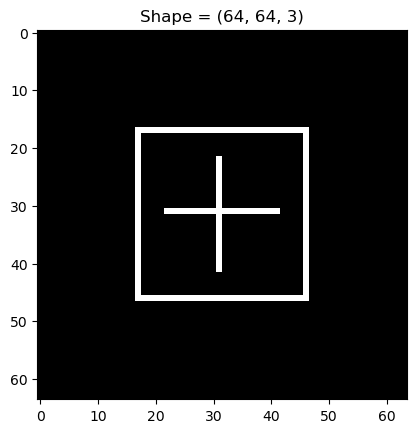

In [305]:
def create_img(H=64, W=64):
    img = np.zeros((H, H, 3), np.uint8)
    xc, yc = 32, 32
    img[yc-10:yc+10, xc-1:xc]=255
    img[yc-1:yc, xc-10:xc+10]=255
    
    img[yc-15:yc-14, xc-15:xc+15]=255
    img[yc+14:yc+15, xc-15:xc+15]=255
    img[yc-15:yc+15, xc-15:xc-14]=255
    img[yc-15:yc+15, xc+14:xc+15]=255
    cv2.imwrite('name.png', img)

    return img

img = create_img()
img1 = img.copy()
showimg(img)

True

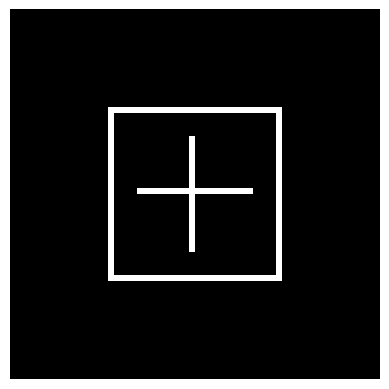

In [167]:
showImgsHorizontally([img])

## <div class="alert alert-info"> I/O

In [209]:
# Loads image as BGR (if grayscale, B=G=R)
img = cv2.imread("name.png") 
img = cv2.imread("name.png", 1) 

# Loads image as is (inc. transparency if available)
img = cv2.imread("name.png", cv2.IMREAD_UNCHANGED) 
img = cv2.imread("name.png", -1) # tiff, bmp, jpg, png as-is

# Loads image as grayscale
img = cv2.imread("name.png", cv2.IMREAD_GRAYSCALE) 
img = cv2.imread("name.png", 0) 

# Saves image Image
cv2.imwrite('name.png', img)

True

## <div class="alert alert-danger"> Color/Intensity/Channels

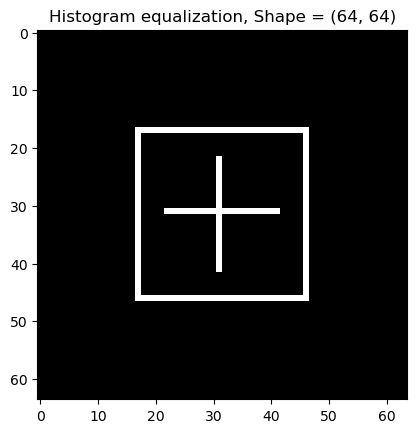

In [176]:
# BGR to gray conversion
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 

# BGR to RGB (useful for matplotlib)
img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 

# Converts grayscale to RGB (R=G=B)
gs2rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB) 

# Histogram equalization
he = cv2.equalizeHist(img_gray)
showimg(he, title='Histogram equalization')

- Other useful color spaces
    - COLOR_BGR2HSV #BGR to HSV (Hue, Saturation, Value)
    - COLOR_HSV2BGR #HSV to BGR 
    - COLOR_BGR2LAB #BGR to Lab (Lightness, Green/Magenta, Blue/Yellow)
    - COLOR_LAB2BGR
    - COLOR_BGR2LUV #BGR to Luv (≈ Lab, but different normalization)
    - COLOR_BGR2YCrCb #BGR to YCrCb (Luma, Blue-Luma, Red-Luma)

In [197]:
img11 = np.zeros(img1.shape[:2]+(4,))
img11[:, :, 3]= img1[:,:,0]
img11.shape

(64, 64, 4)

In [199]:
# Channel manipulation
b, g, r = cv2.split(img1) #Splits the image Img into channels
b, g, r, a = cv2.split(img11) # Same as above, but Img has alpha channel
bgr = cv2.merge((b, g, r)) #Merges channels into image

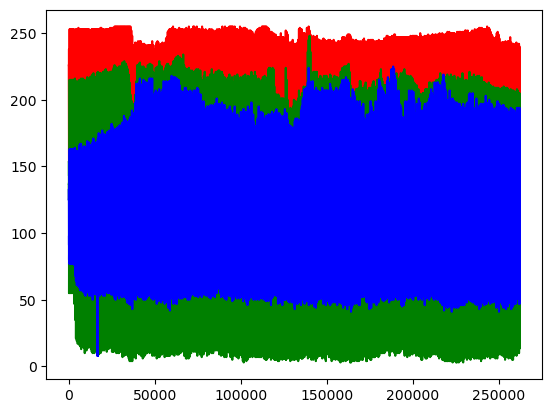

In [204]:
lenna = cv2.imread('Lenna.png',1)
b, g, r = cv2.split(lenna)
plt.plot(r.flatten(), color='red')
plt.plot(g.flatten(), color='green')
plt.plot(b.flatten(), color='blue')
plt.show()

## <div class="alert alert-warning"> Normalization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


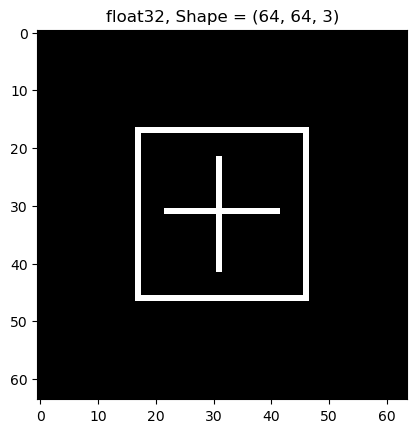

In [215]:
imgf = img1.copy().astype('float32')
showimg(imgf, title=str(imgf.dtype))

In [223]:
# Normalizes Img between 0 and 255, cv2.CV_8UC1) or cv2.CV_8U
nimg8 = cv2.normalize(imgf.astype('float32'), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1) 
nimg8.shape, nimg8.dtype

((64, 64, 3), dtype('uint8'))

In [227]:
# Normalizes Img between 0 and 1, cv2.CV_32F
nimgf32 = cv2.normalize(imgf.astype('float32'), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
nimgf32.shape, nimgf32.dtype

((64, 64, 3), dtype('float32'))

In [237]:
#  Normalizes Img Log Scale
log_nimg = cv2.normalize(255 / np.log(1 + np.max(imgf.astype(np.float32)+1)
                                      ) * np.log(imgf.astype(np.float32)+1),
                         None, alpha=0, beta=255,
                         norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

log_nimg.max(), log_nimg.mean()

(255, 9.649658203125)

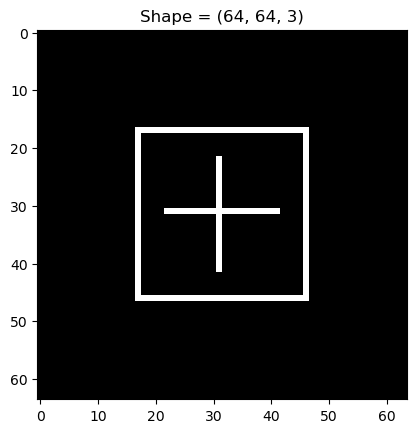

In [241]:
showimg(log_nimg)

In [243]:
# np.array(img, np.uint8)
arr = np.array([[300, 513],[157, 729]])
arr

array([[300, 513],
       [157, 729]])

In [245]:
np.array(arr, np.uint8)

array([[ 44,   1],
       [157, 217]], dtype=uint8)

In [247]:
divisor=256
np.mod(arr, divisor)

array([[ 44,   1],
       [157, 217]])

In [255]:
# PIL
np.array(Image.fromarray(imgf[:,:,0]).convert('L'))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [259]:
np.array(Image.fromarray(arr.astype('float32')).convert('L'))

array([[255, 255],
       [157, 255]], dtype=uint8)

In [261]:
arr[arr>255]=255
arr

array([[255, 255],
       [157, 255]])

## <div class="alert alert-info"> Arithmetic operations

- Note: one of the images can be replaced by a scalar: img1 op img2, img1 op scalar

In [ ]:
alpha, beta, gamma = 6, 7, 3
mga = cv2.add(img1, imgf) #min(I1 + I2, 255) saturated addition if uint8
imga = cv2.addWeighted(img1, alpha, imgf, beta, gamma)#  min(αI1 + βI2 + γ, 255), i.e. image blending
imga = cv2.subtract(img1, imgf) # max(I1 − I2, 0), i.e. saturated subtraction if uint8
imga = cv2.absdiff(img1, imgf)# |I1 − I2|, i.e. absolute difference

## <div class="alert alert-danger"> Logical operations

In [ ]:
Logical operations
inot = cv2.bitwise_not(i) #Inverts every bit in I (e.g. mask inversion)
iand = cv2.bitwise_and(i1, i2) #Logical and between I1 and I2 (e.g. mask image)
ior = cv2.bitwise_or(i1, i2) #Logical or between I1 and I2 (e.g. merge 2 masks)
ixor = cv2.bitwise_xor(i1, i2) #Exclusive or between I1 and I2

## <div class="alert alert-warning"> Statistics

In [291]:
mB, mG, mR, mA = cv2.mean(img11) #Average of each channel (i.e. BGRA)
ms, sds = cv2.meanStdDev(img11) #Mean and SDev p/channel (3 or 4 rows each)
h1 = cv2.calcHist([imgf], [2], None, [256], [0,256]) #Histogram of channel c, no mask, 256 bins (0-255)
h2 = cv2.calcHist([imgf], [0,1], None, [256,256], [0,256, 0,256]) #2D histogram using channels 0 and 1, with
 #“resolution” 256 in each dimension

## <div class="alert alert-success"> Filtering

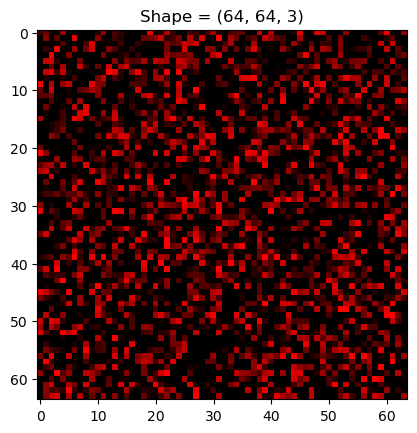

In [311]:
# Add Gaussian Noise
img_gn = create_img()
img_gn = cv2.randn(img_gn ,(0),(99))+img_gn

showimg(img_gn)

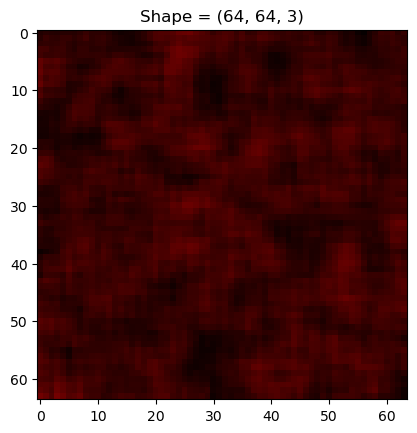

In [313]:
# Box Bluring , Filters I with 5 × 5 box filter (i.e. average filter)
imgb = cv2.blur(img_gn, (5, 5))

showimg(imgb)

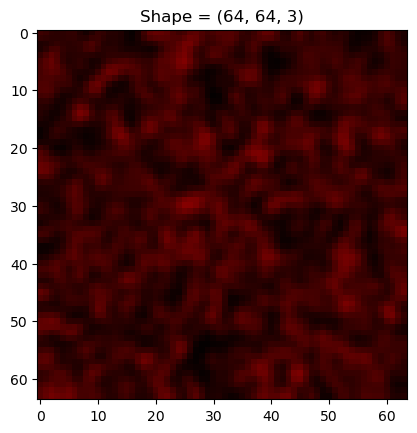

In [315]:
# Filters Img with 5 × 5 Gaussian; auto σs; (I is float)
imggb = cv2.GaussianBlur(img_gn, (5,5), sigmaX=0, sigmaY=0) 
showimg(imggb)

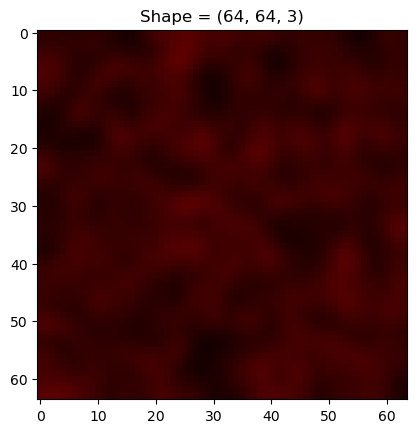

In [317]:
# Blurs, auto kernel dimension
imggb2 = cv2.GaussianBlur(img_gn, None, sigmaX=2, sigmaY=2) 
showimg(imggb2)

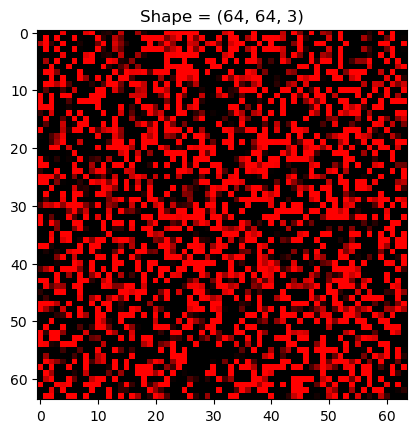

In [319]:
# Filters with 2D kernel using cross-correlation
img2df = cv2.filter2D(img_gn, -1, 3) 
showimg(img2df)

In [337]:
# 1D Gaussian kernel with length 5 (auto StDev)
kx = cv2.getGaussianKernel(5, -1) 
ky = cv2.getGaussianKernel(5, -1) 

# kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kx, ky

(array([[0.0625],
        [0.25  ],
        [0.375 ],
        [0.25  ],
        [0.0625]]),
 array([[0.0625],
        [0.25  ],
        [0.375 ],
        [0.25  ],
        [0.0625]]))

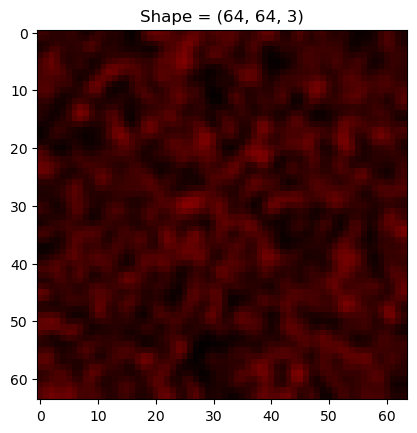

In [339]:
#Filter using separable kernel (same output type)
imgsf = cv2.sepFilter2D(img_gn, -1, kx, ky) 
showimg(imgsf)

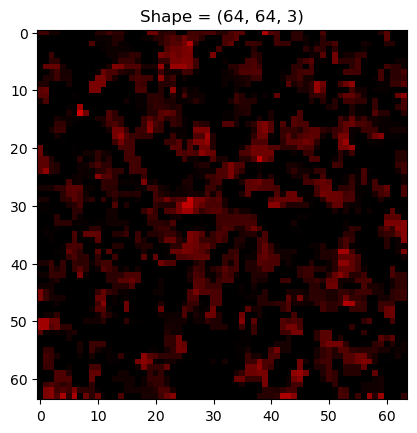

In [343]:
# Median filter with size=3 (size ≥ 3)
imgmb = cv2.medianBlur(img_gn, 3) 
showimg(imgmb)

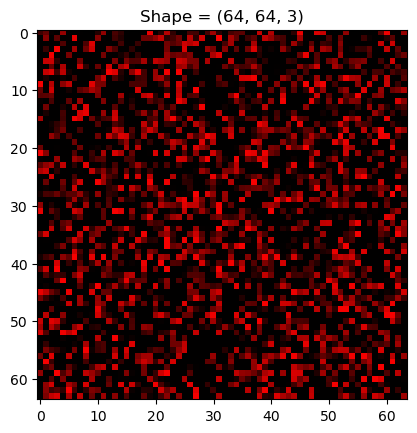

In [345]:
# Bilateral filter with σr = 10, σs = 50, auto size
imgbf = cv2.bilateralFilter(img_gn, -1, 10, 50) 
showimg(imgbf)

- Borders: All filtering operations have parameter borderType which can be set to:
    - BORDER_CONSTANT Pads with constant border (requires additional parameter value)
    - BORDER_REPLICATE Replicates the first/last row and column onto the padding
    - BORDER_REFLECT Reflects the image borders onto the padding
    - BORDER_REFLECT_101 Same as previous, but doesn’t include the pixel at the border (the default)
    - BORDER_WRAP Wraps around the image borders to build the padding
    - Borders can also be added with custom widths:

            img = cv2.copyMakeBorder(img, 2, 2, 3, 1, borderType=BORDER_WRAP) #Widths: top, bottom, left, right

## <div class="alert alert-info"> Differential operators

**Introduction**

- In a convolutional network, the layers near to the input are used to extract spatial features. This behavior is inspired by what happens in human visual system when we are called to recognize an object. The first information that our brain decodes is the **shape**, the **color**, the presence of **textures**, the **orientation** of the light and the **edges**.
- We extract general information from the world which, as we process it, will allow us to obtain more and more abstract information to recognize the object.
- The focus here is on ***edge detection*** or rather the ***calculus of the image first derivative***, taking a look at the differences between the continuous and discrete worlds. Finally, the convolution process through two derivation operators will be analyzed and their advantages and disadvantages will be highlighted

**Notions of continuous differential calculus**
- Mathematically, the derivative expresses the rate of local variability of a function with respect to a direction of development.
- For a function $f: R \rightarrow R$ with only one direction of development x, and let $x_i$ be a point in its domain.
  - The information we want to obtain is whether the signal f, at the working point $x_i$ (local variability), undergoes a variation (increases or decreases) or remains constant. The idea could be to study the around of the working point or better:
    - (i) evaluate f in $x_i$
    - (ii) evaluate f in $x_i$ plus an infinitesimal quantity $\epsilon$
    - (iii) calculate a difference between the two.
  - This is what happens in the calculation of the first derivative which we can formalize with Formula delineated below.
  $$f^{'}(x_i) = lim_{\epsilon \rightarrow 0}\frac{f(x_i +\epsilon)-f(x_i)}{\epsilon}$$
- A function f is ***derivable*** at a working point $x_i$ if the limit of the incremental ratio of the function exists and is finite, as the epsilon increment of the independent variable tends to zero.

**Multidimensional functions**
- Multidimensional functions assume particular importance for the following discussion.
- Let $f: R^n \rightarrow R$ be a scalar field defined on n directions of development, the calculation of the derivative is done by considering the partial first derivatives, or rather the derivatives with respect to each of the n directions.
- The latter constitute the **gradient** $\nabla(f): R^n \rightarrow R^3$, a vector field that associates to each n-dimensional point of the scalar field of a vector. The gradient provides three important pieces of information for each point.
- The first, the modulus, expresses the amount of variation of the function f around the working point,
  $$|\nabla f(x,y)| = \sqrt{\frac{\partial f(x, y)}{\partial x} \bar{x} + \frac{\partial f(x, y)}{\partial y} \bar{y}}$$
- the second is the versus of growth of the function at the calculation point, and
  $$\frac{\partial f(x, y)}{\partial x} \bar{x}$$ and $$\frac{\partial f(x, y)}{\partial y} \bar{y}$$
- the third is the direction, orthogonal to the contour lines of the scalar field.
  $$\theta = tan^{-1}(\frac{\frac{\partial f(x,y)}{\partial x}}{\frac{\partial f(x,y)}{\partial y}})$$

**Edge detection**
- Let $I[x,y]$ be our image in two directions of development, x (width) and y (height) respectively. We define an edge as a region of $I[x,y]$ in which there is a change of color intensity.
- Representation of the three types of edge we can find in image analysis 

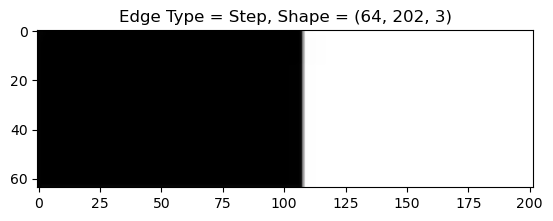

In [372]:
step = cv2.imread(r'/home/alem/Documents/AlemNotes/step.png',-1)
showimg(step, title='Edge Type = Step')

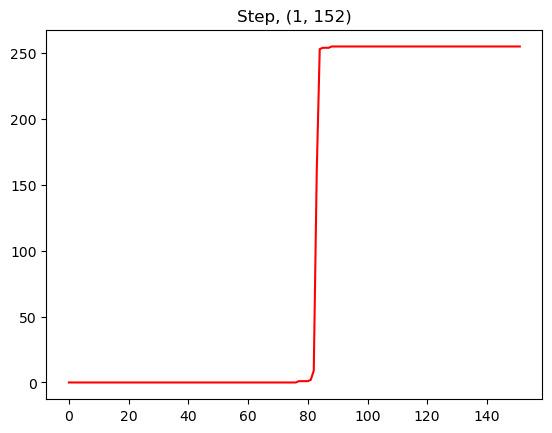

In [384]:
h, w =step.shape[:2]
plt.plot(step[:,:,0][h//2-1:h//2, 25:w-25].flatten(), color='red')
plt.title(f'Step, {step[:,:,0][h//2-1:h//2, 25:w-25].shape}')
plt.show()

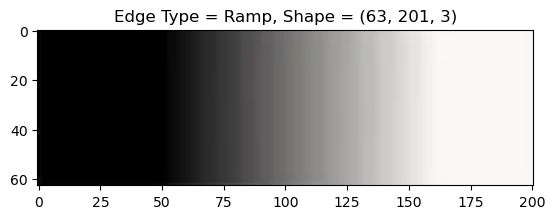

In [390]:
ramp = cv2.imread(r'/home/alem/Documents/AlemNotes/ramp.png',-1)
showimg(ramp, title='Edge Type = Ramp')

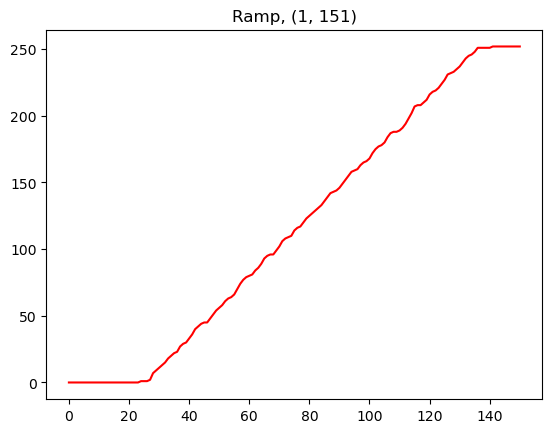

In [392]:
h, w =ramp.shape[:2]
plt.plot(ramp[:,:,0][h//2-1:h//2, 25:w-25].flatten(), color='red')
plt.title(f'Ramp, {ramp[:,:,0][h//2-1:h//2, 25:w-25].shape}')
plt.show()

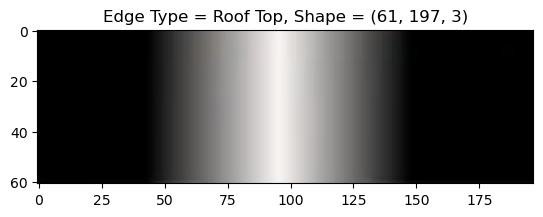

In [394]:
rtop = cv2.imread(r'/home/alem/Documents/AlemNotes/rooftop.png',-1)
showimg(rtop, title='Edge Type = Roof Top')

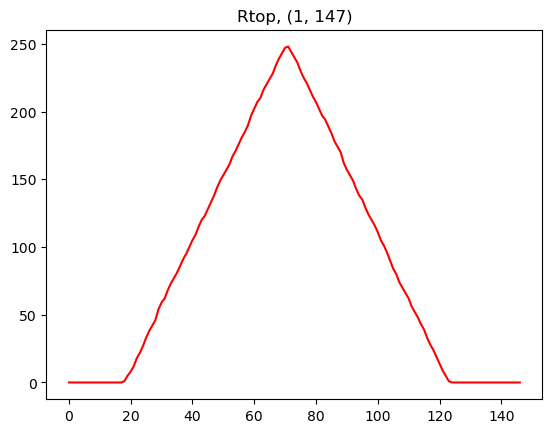

In [397]:
h, w =rtop.shape[:2]
plt.plot(rtop[:,:,0][h//2-1:h//2, 25:w-25].flatten(), color='red')
plt.title(f'Rtop, {rtop[:,:,0][h//2-1:h//2, 25:w-25].shape}')
plt.show()

- Edge detection aims to highlight this variation by calculating the gradient of the image. As we know, the gradient is made up of partial first derivatives. Their formalization, as presented above, is valid in the continuous world. An image, on the other hand, is a discrete multidimensional signal.

**Discrete Partial Derivative**

- The feature of discrete multidimensionality involves an approximation of the **continuous partial first derivative by a finite difference**, where the **epsilon** increment does not tend to cancel **(ϵ → 0)** but takes on a finite value.
- In the case of our discrete signal $I[x,y]$ the value of the increment is equal to **one pixel**. The smallest quantity for which, given the pixel $[x_m,y_n]$, we can move around it to assess the local rate of variability is precisely the pixel.
- Formalizing, we can distinguish three types of **finite differences**:
  - (a) Forward
  - (b) Backward
  - (c) Central

**Convolution**:
- One of the most well-known operations, when we talk about images, is **convolution**. Given a matrix K (Kernel), the convolution makes K slide by a certain stride along with the height and width of the image I, performing a weighted sum between the values of the Kernel and the overlapping region of the image.
- This technique, through an appropriate Kernel transformation, is what we use to apply **finite differences** on the images by calculating the partial first derivative in the two directions of development. A summary and formalization of what has just been said is presented in what follows.
- In the field of computer vision and in particular for edge detection, **Central or also called symmetric differentiation** is used.

- Tabl: Formalization of the three types of finite differences, Forward, Backward and Central in the development directions x and y and the two-dimensional working point $[x_m,y_n]$. To each is associated the corresponding representation through Kernel of dimension 1x3 for the development direction x and 3x1 for the development direction y. [Src: Internet]

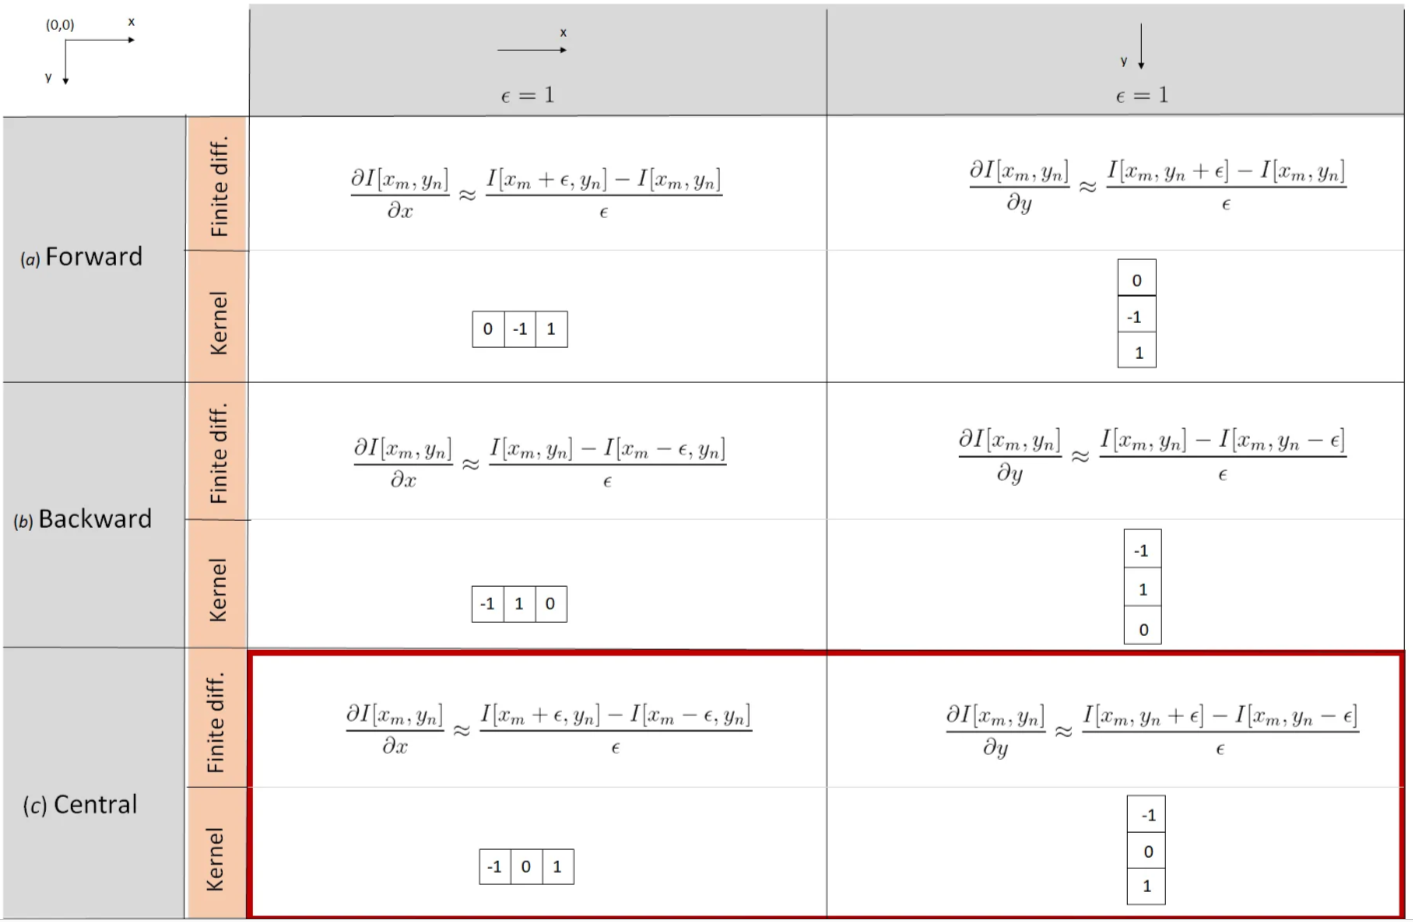

In [416]:
dimg(filename=r'/home/alem/Documents/AlemNotes/cnvtbl.png') 

**Discrete gradient**
- The convolution produces a new image, called a features map (F), having the same dimensions in terms of height and width as ***I (stride = 1 and padding = ‘same’)*** and in which specific features of I are emphasized. As an example, if we calculate the convolution between I[x,y] and Kx (Kernel of derivation with respect to x), the result will be a new image Fx in which the vertical edges will have a non-zero intensity value to the detriment of the horizontal edges. In particular, we can say that:
  - ***the intensity value of the pixel $F_x[x_m,y_n]$ corresponds to the value of the partial first derivative at the point $I[x_m,y_n]$.***
 
- The same analysis can be carried out by considering Ky (derivation kernel with respect to y).

  $|G[x_m, y_n]| = \sqrt(F_x[x_m, y_n]^2 + F_y[x_m, y_m]^2)$

  $\theta = tan^{-}(\frac{F_y[x_m, y_n]}{F_x[x_m, y_n]})$

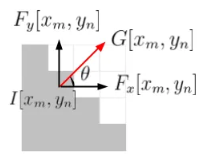

In [423]:
dimg(filename=r'/home/alem/Documents/AlemNotes/edges_est.png') 

- Once the values of the partial derivatives have been obtained, we can calculate the gradient G. The latter will associate to each pixel $I[x_m,y_n]$ the information on the modulus, which will indicate the quantity or magnitude of variation of the image around $[x_m,y_n]$ and on the direction, which will express the direction of growth of the color intensity around the pixel of interest. Fig.3 shows a geometric representation of what has been said. Since we are in the discrete world, a more correct representation can be found as ensues

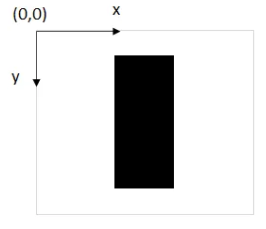

In [426]:
dimg(filename=r'/home/alem/Documents/AlemNotes/example.png') 

- (A) Input Image With Left, Right, Top, and Bottom Edges. That is, it shows the image $I[x,y]$ with two edges in the respective directions (x or y) of development

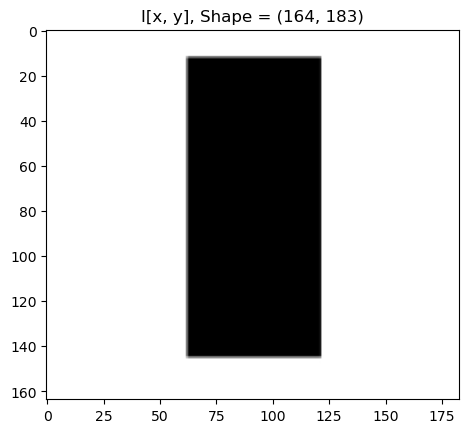

In [449]:
ce = cv2.imread('/home/alem/Documents/AlemNotes/ce.png', -1)
I = ce.copy() # I[x, y]
# Convert I to Grayscale
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

showimg(I, title='I[x, y]')

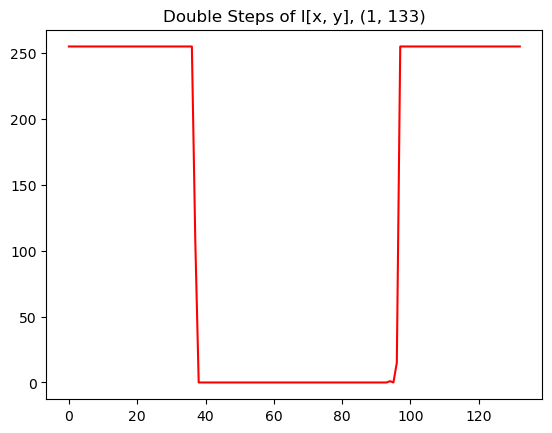

In [483]:
h, w = I.shape[:2]
plt.plot(I[h//2-1:h//2, 25:w-25].flatten(), color='red')
plt.title(f'Double Steps of I[x, y], {I[h//2-1:h//2, 25:w-25].shape}')
plt.show()

- (B) The plot below shows $F_x = I[x, y]*K_x$, or rather, the derivative of (A) with respect to x. Note how the vertical edges are highlighted with respect to the horizontal ones.

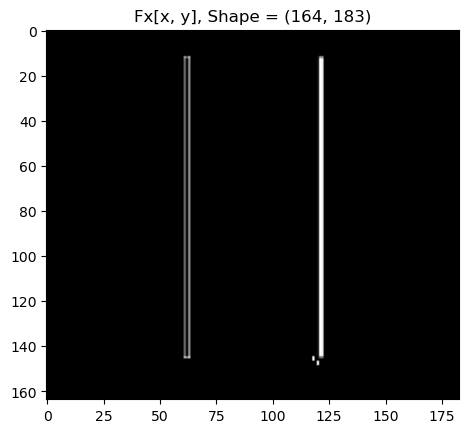

array([[ 1,  0, -1]])

In [456]:
#-Derivative x
Kx = -1*np.array([[-1,0,1]])
Fx = ndimage.convolve(I, Kx)
showimg(Fx, title='Fx[x, y]')
Kx

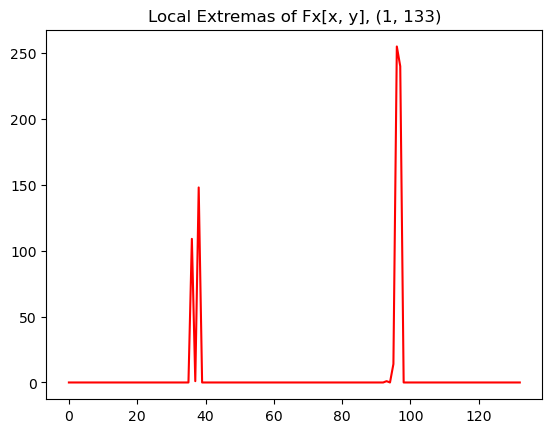

In [485]:
h, w = Fx.shape[:2]
plt.plot(Fx[h//2-1:h//2, 25:w-25].flatten(), color='red')
plt.title(f'Local Extremas of Fx[x, y], {Fx[h//2-1:h//2, 25:w-25].shape}')
plt.show()

- (C) The plot below is that of $F_y = I[x, y]*K_y$, or rather, it is the representation of the derivative with respect to y. The behavior, in this case, is opposite to what we saw in (B).

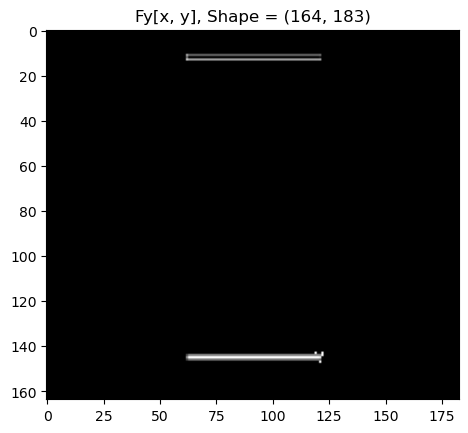

array([[ 1],
       [ 0],
       [-1]])

In [458]:
#-Derivative y
Ky = -1*np.array([[-1],[0],[1]])
Fy = ndimage.convolve(I, Ky)
showimg(Fy, title='Fy[x, y]')
Ky

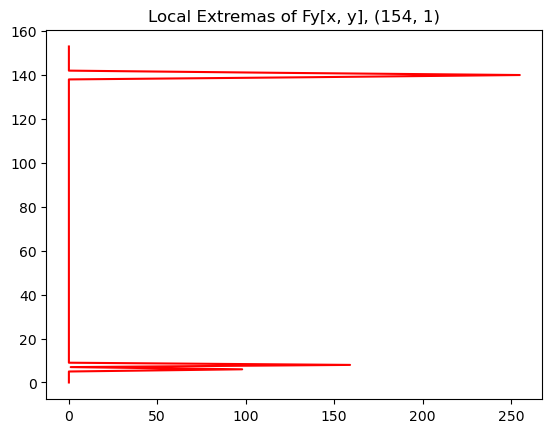

In [495]:
h, w = Fy.shape[:2]
xx = Fy[5:h-5, w//2-1:w//2].flatten()
yy = list(range(len(xx)))
plt.plot(xx, yy, color='red')
plt.title(f'Local Extremas of Fy[x, y], {Fy[5:h-5, w//2-1:w//2].shape}')
plt.show()

- (D) Mahnitude

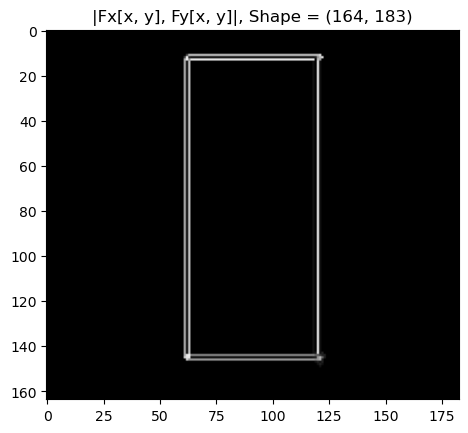

In [477]:
#--Magnitute
mag = np.sqrt(Fx**2 + Fy**2) # G
showimg(mag, title='|Fx[x, y], Fy[x, y]|')

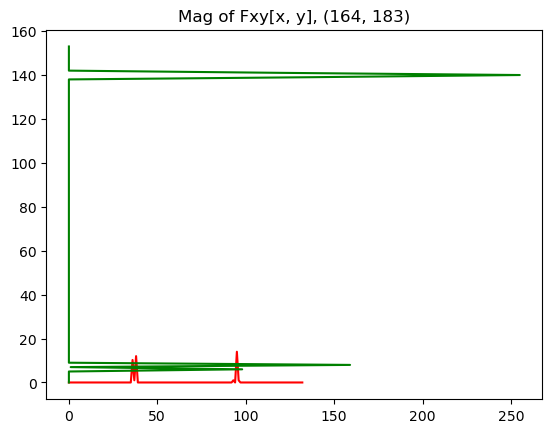

In [499]:
h, w = mag.shape[:2]
plt.plot(mag[h//2-1:h//2, 25:w-25].flatten(), color='red')
xx = Fy[5:h-5, w//2-1:w//2].flatten()
yy = list(range(len(xx)))
plt.plot(xx, yy, color='green')

plt.title(f'Mag of Fxy[x, y], {mag.shape}')
plt.show()

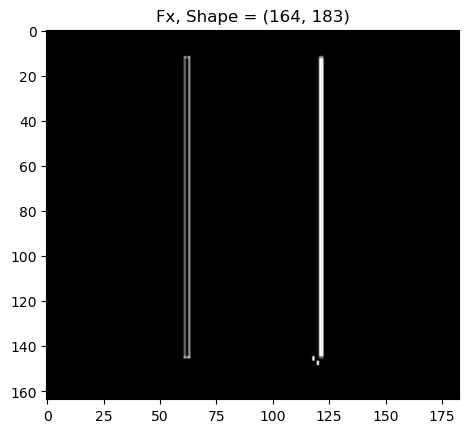

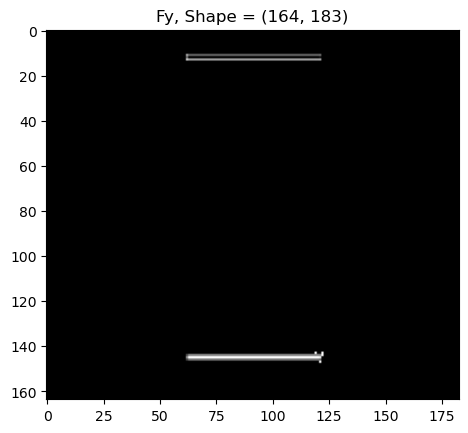

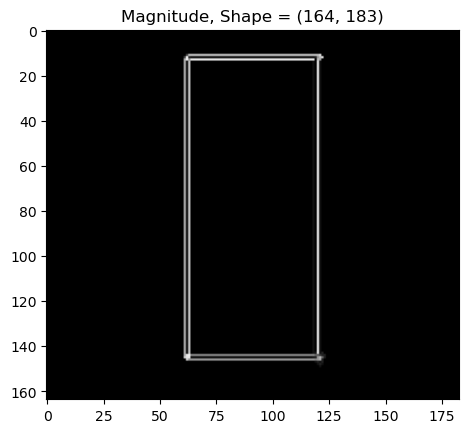

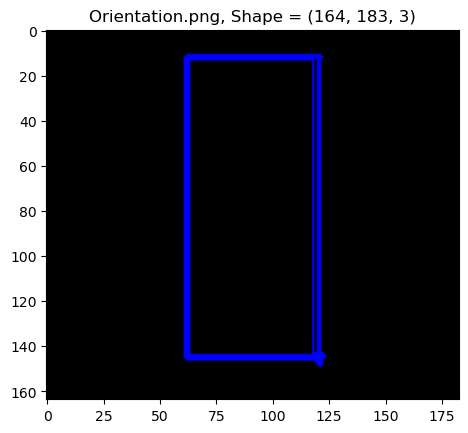

In [474]:
# Get Input Image
I = cv2.imread('/home/alem/Documents/AlemNotes/ce.png', -1)

# Convert I to Grayscale
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

#-Derivative x
Kx = -1*np.array([[-1,0,1]])
Fx = ndimage.convolve(I, Kx)

#-Derivative y
Ky = -1*np.array([[-1],[0],[1]])
Fy = ndimage.convolve(I, Ky)

#-Gradient 

#--Magnitute
magnitude = np.sqrt(Fx**2 + Fy**2) # G

#--Orientation
phase = cv2.phase(Fx.astype('float32'), Fy.astype('float32'), angleInDegrees=True) #theta
mask_phase = np.zeros((I.shape[0], I.shape[1],3), dtype=np.uint8)

mask_phase[(magnitude != 0) & (phase >= 0) & (phase <= 90)] = np.array([0, 0, 255]) #red
mask_phase[(magnitude != 0) &  (phase > 90) & (phase <= 180)] = np.array([0, 255, 255]) #yellow
mask_phase[(magnitude != 0) & (phase > 180) & (phase <= 270)] = np.array([0, 255, 0]) #green
mask_phase[(magnitude != 0) & (phase > 270) & (phase <= 360)] = np.array([255, 0, 0])  #blue

#-Display Images
showimg(np.abs(Fx), "Fx")
showimg(np.abs(Fy), "Fy")

showimg(magnitude, "Magnitude")
showimg(mask_phase, "Orientation.png")


In [ ]:
Differential operators
i_x = Sobel(i, CV_32F, 1, 0) Sobel in the x-direction: Ix = ∂x ∂ I
i_y = Sobel(i, CV_32F, 0, 1) Sobel in the y-direction: Iy = ∂y ∂ I
i_x, i_y = spatialGradient(i, 3) The gradient: ∇I (using 3 × 3 Sobel): needs uint8 image
m = magnitude(i_x, i_y) ∥∇I∥; Ix, Iy must be float (for conversion, see np.astype())
m, d = cartToPolar(i_x, i_y) ∥∇I∥; θ ∈ [0, 2π]; angleInDegrees=False; needs float32 Ix, Iy
l = Laplacian(i, CV_32F, ksize=5) ∆I, Laplacian with kernel size of 5
Geometric transforms
i = resize(i, (width, height)) Resizes image to width×height
i = resize(i, None, fx=0.2, fy=0.1) Scales image to 20% width and 10% height
M = getRotationMatrix2D((xc, yc), deg, Returns 2 × 3 rotation matrix M, arbitrary (xc, yc)
scale)
M = getAffineTransform(pts1,pts2) Affne transform matrix M from 3 correspondences
i = warpAffine(i, M, (cols,rows)) Applies Affne transform M to I, output size=(cols, rows)
M = getPerspectiveTransform(pts1,pts2) Perspective transform matrix M from 4 correspondences
M, s = findHomography(pts1, pts2) Persp transf mx M from all ≫ 4 corresps (Least squares)
M, s = findHomography(pts1, pts2, RANSAC) Persp transf mx M from best ≫ 4 corresps (RANSAC)
i = warpPerspective(i, M, (cols, rows)) Applies perspective transform M to image I
Interpolation methods
resize, warpAffine and warpPerspective use bilinear interpolation by default. It can be changed by
parameter interpolation for resize, and flags for the others:
flags=INTER_NEAREST Simplest, fastest (or interpolation=INTER_NEAREST)
flags=INTER_LINEAR Bilinear interpolation: Default
flags=INTER_CUBIC Bicubic interpolation
Segmentation
_, i_t = threshold(i, t, 255, THRESH_BINARY) Manually thresholds image I given threshold level t
t, i_t = threshold(i, 0, 255, THRESH_OTSU) Returns thresh level and thresholded image using Otsu
i_t = adaptiveThreshold(i, 255,
ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY, b, c) Adaptive mean-c with block size b and constant c
bp = calcBackProject([i_hsv], [0,1], h, Back-projects histogram h onto the image i_hsv
[0,180, 0,256], 1) using only hue and saturation; no scaling (i.e. 1)
cp, la, ct = kmeans(feats, K, None, crit, 10, Returns the labels la and centers ct of K clusters,
KMEANS_RANDOM_CENTERS) best compactness cp out of 10; 1 feat/column

In [ ]:
displayz

In [ ]:
create_img(H=64, W=64)

In [109]:
def create_sobel_gradient(
                            img: np.ndarray,
                            flag: bool = False
                         ) -> np.ndarray:
    # Denoise Image 
    img = ndimage.median_filter(img, size=3, cval=0, mode='constant')
    img = ndimage.gaussian_filter(img, 8)

    if flag:
        return img

    # Apply Sobel Filter  Along X-Axis
    sx = ndimage.sobel(img, axis=0, mode='constant')

    # Apply Sobel Filter  Along Y-Axis
    sy = ndimage.sobel(img, axis=1, mode='constant')

    # Calculate the magnitude of gradient
    sobxy = np.hypot(sx, sy)

    return sobxy

## <div class="alert alert-danger"> DCT

## <div class="alert alert-warning"> FFT

## <div class="alert alert-warning"> Defects

- Dead Pixel
- Mura
- Stuck Pixels
- White Dots
- Noises